In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('Historical_Losses_Data.csv')
df1 = pd.read_csv('Data.csv')

In [3]:
df

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
0,150023,24.0,5.0,1,M,Married,11,P,203
1,152720,31.0,10.0,1,F,Single,6,P,402
2,174207,56.0,37.0,1,M,Married,0,D,553
3,139895,52.0,31.0,1,F,Married,15,P,292
4,174407,20.0,3.0,1,M,Single,15,P,247
...,...,...,...,...,...,...,...,...,...
15285,189499,61.0,43.0,4,F,Single,11,P,58
15286,142111,69.0,48.0,4,F,Married,9,P,305
15287,175986,69.0,51.0,4,F,Married,13,P,282
15288,199800,22.0,4.0,4,M,Married,9,D,822


In [4]:
df1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


List to collect all the names of all Variables

In [5]:
df.columns

Index(['Policy_Number', 'Age', 'Years_of_Driving_Experience',
       'Number_of_Vehicles', 'Gender', 'Married', 'Vehicle_Age', 'Fuel_Type',
       'Losses'],
      dtype='object')

In [6]:
df1.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [7]:
c = df.columns.tolist()

Here we can see the data is in normalised form or not by comparing mean= median ie. 50%

In [8]:
desc_data = df.describe()

In [9]:
df.describe()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses
count,15290.000000,15251.000000,15273.000000,15290.000000,15290.000000,15290.000000
mean,149910.276651,42.322471,23.731225,2.495880,8.655723,389.858012
std,28948.806631,18.280801,17.849800,0.953776,4.344536,253.729469
min,100002.000000,16.000000,0.000000,1.000000,0.000000,13.000000
25%,124842.000000,24.000000,6.000000,2.000000,6.000000,226.000000
50%,149872.000000,42.000000,23.000000,2.000000,9.000000,355.000000
75%,175011.000000,61.000000,42.000000,3.000000,12.000000,489.000000
max,200000.000000,70.000000,53.000000,4.000000,15.000000,3500.000000


In [10]:
df.skew()

C:\Users\E7470\AppData\Local\Temp\ipykernel_9352\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Policy_Number                  0.003121
Age                            0.050425
Years_of_Driving_Experience    0.097956
Number_of_Vehicles             0.006572
Vehicle_Age                   -0.344798
Losses                         2.558777
dtype: float64

Losses are heavily skewed

In [11]:
df.cov()

,Policy_Number,Age,Years_of_Driving_Experience,Number_of_Vehicles,Vehicle_Age,Losses
Policy_Number,8.380334e+08,-22.966577,626.085960,361.781047,-163.887939,33594.870077
Age,-2.296658e+01,334.187678,325.350142,0.151338,-19.371437,-2055.854819
Years_of_Driving_Experience,6.260860e+02,325.350142,318.615354,0.138356,-18.471856,-2000.432244
Number_of_Vehicles,3.617810e+02,0.151338,0.138356,0.909689,0.024548,-2.794653
Vehicle_Age,-1.638879e+02,-19.371437,-18.471856,0.024548,18.874990,-302.851293
Losses,3.359487e+04,-2055.854819,-2000.432244,-2.794653,-302.851293,64378.643649


In [12]:
corr = df.corr()

<AxesSubplot:>

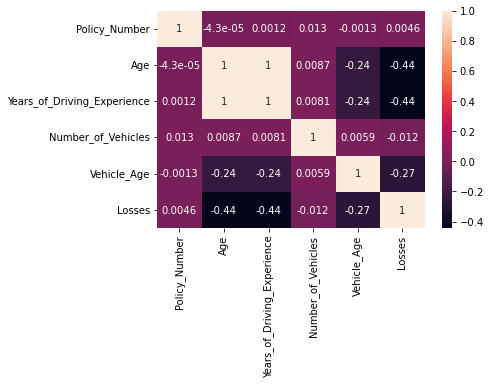

In [13]:
sns.heatmap(corr,xticklabels = corr.columns.values,
                 yticklabels = corr.columns.values,annot = True)

Missing Value report

In [14]:
total_miss = df.isnull().sum().sort_values(ascending = False)

In [15]:
total_miss

Age                            39
Years_of_Driving_Experience    17
Policy_Number                   0
Number_of_Vehicles              0
Gender                          0
Married                         0
Vehicle_Age                     0
Fuel_Type                       0
Losses                          0
dtype: int64

In [16]:
miss_pct =((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)

In [17]:
miss_pct

Age                            0.255069
Years_of_Driving_Experience    0.111184
Policy_Number                  0.000000
Number_of_Vehicles             0.000000
Gender                         0.000000
Married                        0.000000
Vehicle_Age                    0.000000
Fuel_Type                      0.000000
Losses                         0.000000
dtype: float64

In [18]:
missing_info = pd.concat([total_miss,miss_pct],axis = 1, keys = ['Miss_Count','Miss_PCT'])

In [19]:
missing_info = missing_info.reset_index()

In [20]:
missing_info.rename(columns = {'index':'Variable'}, inplace = True)

In [21]:
missing_info

,Variable,Miss_Count,Miss_PCT
0,Age,39,0.255069
1,Years_of_Driving_Experience,17,0.111184
2,Policy_Number,0,0.000000
3,Number_of_Vehicles,0,0.000000
4,Gender,0,0.000000
5,Married,0,0.000000
6,Vehicle_Age,0,0.000000
7,Fuel_Type,0,0.000000
8,Losses,0,0.000000


Data is missing in Age and Years of Driving Experience compenset it with Mean, Median values

Missing Value Treatment

In [22]:
df.drop('Policy_Number',axis = 1, inplace = True)

In [23]:
df

,Age,Years_of_Driving_Experience,Number_of_Vehicles,Gender,Married,Vehicle_Age,Fuel_Type,Losses
0,24.0,5.0,1,M,Married,11,P,203
1,31.0,10.0,1,F,Single,6,P,402
2,56.0,37.0,1,M,Married,0,D,553
3,52.0,31.0,1,F,Married,15,P,292
4,20.0,3.0,1,M,Single,15,P,247
...,...,...,...,...,...,...,...,...
15285,61.0,43.0,4,F,Single,11,P,58
15286,69.0,48.0,4,F,Married,9,P,305
15287,69.0,51.0,4,F,Married,13,P,282
15288,22.0,4.0,4,M,Married,9,D,822


In [24]:
#Substitute values by mean , median(median is the robust one always preferable)
mean_val = df['Age'].mean()


In [25]:
mean_val

42.322470657661796

In [26]:
median_val = df['Age'].median()

In [27]:
median_val

42.0

In [28]:
df['Age'] = df['Age'].fillna(mean_val)

In [29]:
df['Fuel_Type'] = df['Fuel_Type'].fillna('NA')

Outlier Report

In [30]:
#lets normalise the skewness IQR(Inter Quantile Range)

Q1 = df['Losses'].quantile(0.25)
Q3 = df['Losses'].quantile(0.75)
IQR = Q3 - Q1
Low_Boundary = Q1 - (1.5*IQR)
High_Boundary = Q3 + (1.5*IQR)

Q1 = df['Vehicle_Age'].quantile(0.25)
Q3 = df['Vehicle_Age'].quantile(0.75)
IQR = Q3 - Q1
Low_Boundary_veh = Q1 - (1.5*IQR)
High_Boundary_veh = Q3 + (1.5*IQR)

C:\Users\E7470\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\E7470\AppData\Local\Temp\ipykernel_9352\2639053961.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Skewnwss %f" % df.skew())


TypeError: cannot convert the series to <class 'float'>

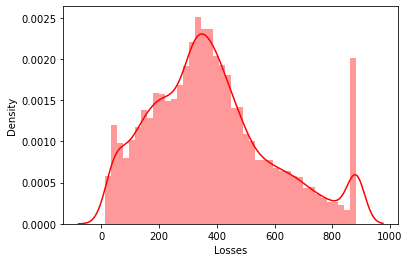

In [55]:
#Outlier treatment of losses
df['Losses'].clip(lower = Low_Boundary, inplace = True)
df['Losses'].clip(upper = High_Boundary, inplace = True)
df['Losses'].astype(float)
sns.distplot(df['Losses'], color ='r')
print("Skewnwss %f" % df.skew())

C:\Users\E7470\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\E7470\AppData\Local\Temp\ipykernel_9352\2285556579.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Skewness: %f" % df.skew())


TypeError: cannot convert the series to <class 'float'>

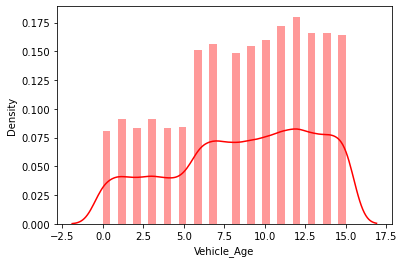

In [32]:
df['Vehicle_Age'].clip(lower=Low_Boundary,inplace=True)
df['Vehicle_Age'].clip(upper=High_Boundary,inplace=True)
sns.distplot(df['Vehicle_Age'], color="r")
print("Skewness: %f" % df.skew())

C:\Users\E7470\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

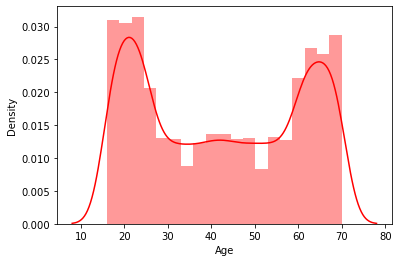

In [33]:
sns.distplot(df['Age'], color = 'r')

# Univariate Analysis

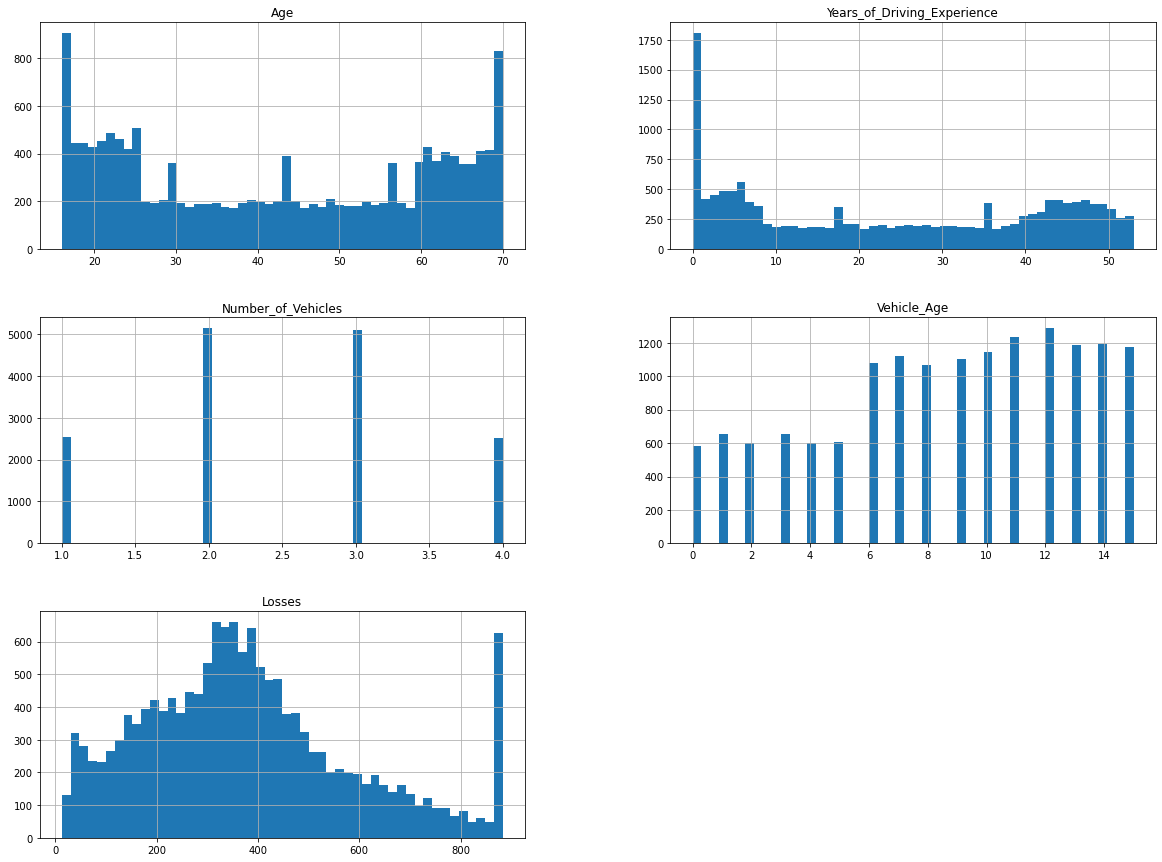

In [34]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

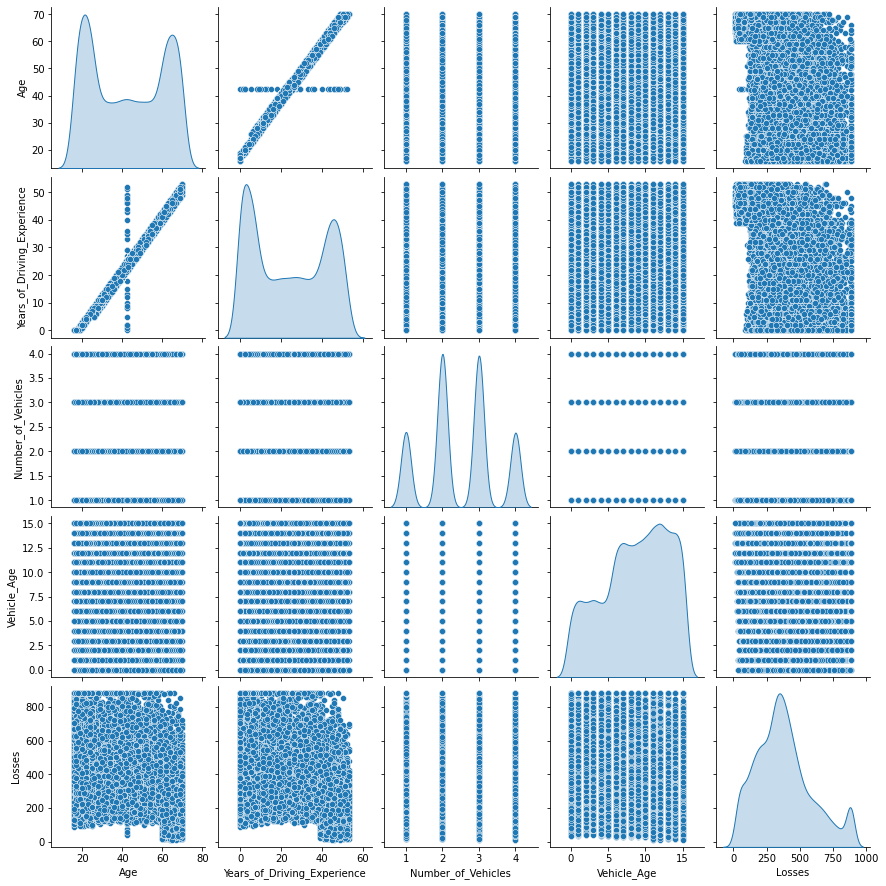

In [35]:
sns.pairplot(df,diag_kind = 'kde')

# Bivariate Analysis

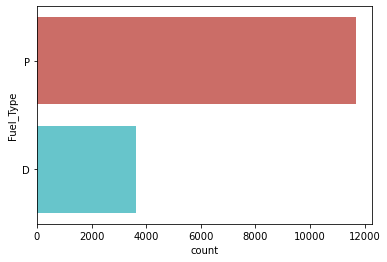

In [36]:
sns.countplot(y = 'Fuel_Type', data = df, palette = 'hls')
plt.show()

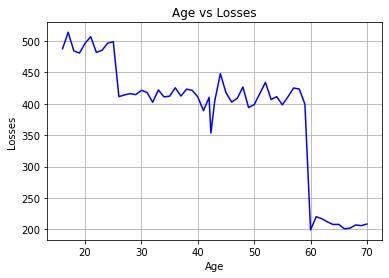

In [37]:
subs_data = df.groupby('Fuel_Type').mean()
subs_data = df.groupby('Age').mean()
subs_data = subs_data.reset_index()
plt.plot(subs_data.Age, subs_data.Losses, color = 'blue')
plt.title('Age vs Losses')
plt.xlabel('Age')
plt.ylabel('Losses')
plt.grid()
plt.show()

# Data Preperation

In [38]:
df1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [39]:
sub_data = df1.iloc[2:7 ,1:3]

In [40]:
sub_data

,Age,Salary
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0


In [41]:
age_val = df1['Age'].mean()
sal_val = df1['Salary'].mean()

In [42]:
age_val

38.77777777777778

In [43]:
sal_val

63777.77777777778

In [44]:
df1['Age'] = df1['Age'].fillna(age_val)
df1['Salary'] = df1['Salary'].fillna(sal_val)

In [45]:
df1

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [46]:
X_DF = df1.iloc[0:10,0:3]
Y_DF = df1.iloc[0:10,3:4]

In [47]:
X_DF

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [48]:
Y_DF

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [49]:
X = df1.iloc[0:10,0:3].values
Y = df1.iloc[0:10,3:4].values